In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from keras.optimizers import Adam
import seaborn as snsn

In [69]:
data = pd.read_csv('../input/data-set-healthcare/diabetes.csv')


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [72]:
X = data.drop('Outcome', axis=1)  
y = data['Outcome']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
model = Sequential()

In [76]:
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4683 - loss: 0.7510 - val_accuracy: 0.4677 - val_loss: 0.7050
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.6341 - val_accuracy: 0.5806 - val_loss: 0.6466
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.5828 - val_accuracy: 0.6935 - val_loss: 0.6078
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.5505 - val_accuracy: 0.7581 - val_loss: 0.5794
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7237 - loss: 0.5423 - val_accuracy: 0.7419 - val_loss: 0.5602
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4994 - val_accuracy: 0.7419 - val_loss: 0.5464
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.4916 - val_accuracy: 0.7419 - val_loss: 0.5349
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.4826 - val_accuracy: 0.7419 - val_loss:

In [80]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [81]:
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


In [82]:
precision = precision_score(y_test, y_pred_class)
print(f'Precision: {precision:.2f}')

Precision: 0.63


In [83]:
recall = recall_score(y_test, y_pred_class)
print(f'Recall: {recall:.2f}')

Recall: 0.65


In [84]:
f1 = f1_score(y_test, y_pred_class)
print(f'F1-Score: {f1:.2f}')

F1-Score: 0.64


In [85]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7233 - loss: 0.5690 
Test Accuracy: 0.74


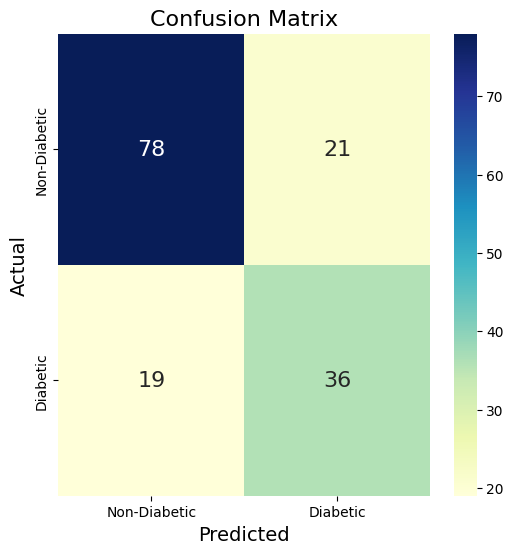

In [86]:

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,6))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'], cbar=True, annot_kws={'size': 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


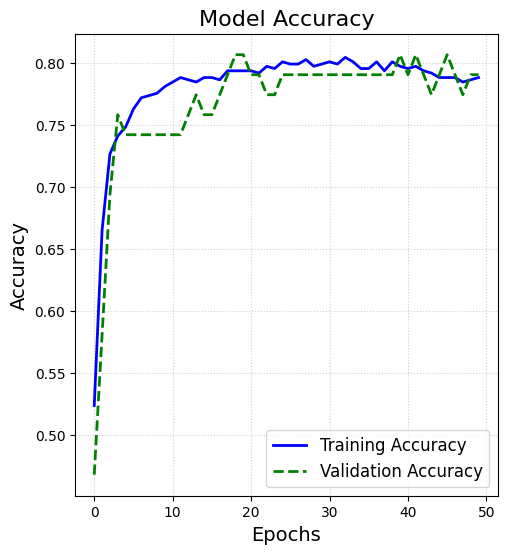

In [87]:

plt.figure(figsize=(12, 6))  


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g', linestyle='--', linewidth=2)


plt.grid(True, linestyle=':', alpha=0.6)

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy', fontsize=16)
plt.legend(loc='lower right', fontsize=12)


plt.show()


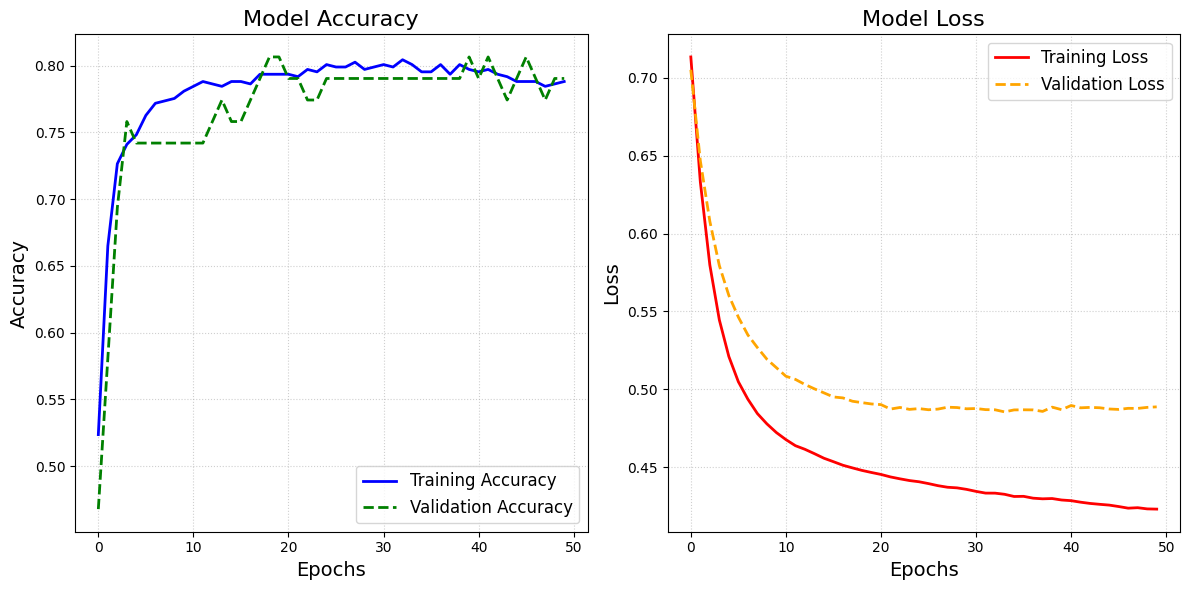

In [88]:

plt.figure(figsize=(12, 6))  


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g', linestyle='--', linewidth=2)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy', fontsize=16)
plt.legend(loc='lower right', fontsize=12)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='r', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)


plt.grid(True, linestyle=':', alpha=0.6)


plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Model Loss', fontsize=16)
plt.legend(loc='upper right', fontsize=12)


plt.tight_layout()  # Ensure the layout doesn't overlap
plt.show()


In [89]:
#Adding more hidden layers
model1 = Sequential()

In [90]:
model1.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
optimizer1 = Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [92]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4123 - loss: 0.7246 - val_accuracy: 0.6290 - val_loss: 0.6457
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - loss: 0.6453 - val_accuracy: 0.7903 - val_loss: 0.6147
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.6051 - val_accuracy: 0.7419 - val_loss: 0.5867
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.5455 - val_accuracy: 0.7258 - val_loss: 0.5606
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.5244 - val_accuracy: 0.7258 - val_loss: 0.5378
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5102 - val_accuracy: 0.7419 - val_loss: 0.5197
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7591 - loss: 0.5154 - val_accuracy: 0.7419 - val_loss: 0.5067
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.4836 - val_accuracy: 0.7742 - val_loss:

In [93]:
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print(f'Experiment 1 Test Accuracy: {accuracy1:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 0.5517 
Experiment 1 Test Accuracy: 0.75


In [94]:
#Changeing batch size and neurons
model2 = Sequential()

In [95]:
model2.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [96]:
model2.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))

In [ ]:
model2.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))

In [98]:
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f'Experiment 2 Test Accuracy: {accuracy2:.2f}')

ValueError: You must call `compile()` before using the model.